epoch=0, loss=3.29853
epoch=100, loss=2.11278
epoch=200, loss=0.77947
epoch=300, loss=0.35666
epoch=400, loss=0.31874
epoch=500, loss=0.25674
epoch=600, loss=0.30697
epoch=700, loss=0.19072
epoch=800, loss=0.21564
epoch=900, loss=0.21729
epoch=1000, loss=0.17815
epoch=1100, loss=0.17672
epoch=1200, loss=0.25123
epoch=1300, loss=0.19281
epoch=1400, loss=0.20407
epoch=1500, loss=0.20002
epoch=1600, loss=0.16866
epoch=1700, loss=0.17966
epoch=1800, loss=0.15687
epoch=1900, loss=0.15962
epoch=2000, loss=0.18942
epoch=2100, loss=0.15836
epoch=2200, loss=0.17896
epoch=2300, loss=0.16818
epoch=2400, loss=0.14995
epoch=2500, loss=0.16511
epoch=2600, loss=0.16526
epoch=2700, loss=0.19226
epoch=2800, loss=0.14593
epoch=2900, loss=0.15071
epoch=3000, loss=0.15285
epoch=3100, loss=0.17363
epoch=3200, loss=0.14725
epoch=3300, loss=0.18435
epoch=3400, loss=0.17770
epoch=3500, loss=0.29771
epoch=3600, loss=0.14911
epoch=3700, loss=0.18306
epoch=3800, loss=0.14025
epoch=3900, loss=0.19975
epoch=4000, 

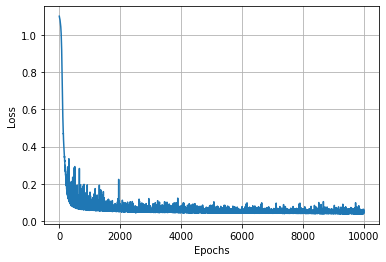

In [2]:
from torch.utils.data import TensorDataset, DataLoader
import torch
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('iris.csv').to_numpy()
x_tensor = torch.Tensor(dataset[:,0:-1])
y_tensor = torch.LongTensor(dataset[:,-1])

iris = TensorDataset(x_tensor, y_tensor)

BATSIZE = 50
loader = DataLoader(dataset=iris,
                    batch_size=BATSIZE,
                    shuffle=True)

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(4, 64)
        self.fc2 = torch.nn.Linear(64, 32)
        self.fc3 = torch.nn.Linear(32, 16)
        self.fc4 = torch.nn.Linear(16, 3)
        self.relu = torch.nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        z = self.fc4(x)
        
        return z

net = Net()
cel = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

loss_lst = []
EPOCH = 10000
for epoch in range(EPOCH):
    l_sum = 0
    for data in loader:
        x, y = data
        z = net(x)
        loss = cel(z, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        l_sum += loss.item()
    loss_lst.append(l_sum/len(loader))

    if epoch % 100 == 0:
        print(f'epoch={epoch}, loss={l_sum:0.5f}')

plt.plot(range(EPOCH), loss_lst)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

correct_sum = 0
for data in loader:
    x, y = data
    z = net(x)
    y_hat = torch.argmax(torch.softmax(z,dim=1),dim=1)
    correct_sum += torch.sum(y==y_hat)
    
accuracy = correct_sum / len(iris) * 100

print(f'Accuracy={accuracy:0.2f}%')